## Homework 5
### Author: Tsapiv Maksym
### Variant: 0

### Task 1

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

I implemented strategies and ran a few experiments with different number of agents in each experiment (from 1 to 100) but within 1 experiment number of agent of each strategy stays the same.

### Here is some work with data to plot it

In [57]:
ex1 = pd.read_csv('data/PD N-Person Iterated tournament experiment1-spreadsheet.csv')
ex10 = pd.read_csv('data/PD N-Person Iterated tournament experiment10-spreadsheet.csv')
ex20 = pd.read_csv('data/PD N-Person Iterated tournament experiment20-spreadsheet.csv')
ex50 = pd.read_csv('data/PD N-Person Iterated tournament experiment50-spreadsheet.csv')
ex100 = pd.read_csv('data/PD N-Person Iterated tournament experiment100-spreadsheet.csv')

df = pd.concat([ex1, ex10, ex20, ex50, ex100])
df


,random_av,cooperate_av,defect_av,tit-for-tat_av,grofman_av,shubik_av
0,1.729412,1.000000,2.238579,1.708995,2.292308,2.336957
0,1.796736,1.334875,2.206422,1.960012,2.022908,2.219114
0,1.801621,1.351714,2.172797,1.945195,2.029460,2.174109
0,1.812175,1.352764,2.187358,1.940254,2.029768,2.187723
0,1.821747,1.354118,2.212982,1.920204,2.051662,2.209150


In [58]:
np.array(ex1.iloc[0])

array([1.72941176, 1.        , 2.23857868, 1.70899471, 2.29230769,
       2.33695652])

In [64]:
to_plot = np.array([np.array(df.iloc[0]), np.array(df.iloc[1]), np.array(df.iloc[2]),
 np.array(df.iloc[3]), np.array(df.iloc[4])])

to_plot

array([[1.72941176, 1.        , 2.23857868, 1.70899471, 2.29230769,
        2.33695652],
       [1.79673621, 1.33487512, 2.20642178, 1.9600125 , 2.022908  ,
        2.2191141 ],
       [1.80162121, 1.35171438, 2.17279656, 1.94519496, 2.0294597 ,
        2.17410869],
       [1.81217518, 1.35276435, 2.18735843, 1.94025449, 2.029768  ,
        2.18772261],
       [1.82174737, 1.35411793, 2.21298211, 1.92020401, 2.05166174,
        2.20915019]])

([<matplotlib.axis.XTick at 0x7f9b16079250>,
 [Text(1, 0, 'random'),
  Text(2, 0, 'cooperate'),
  Text(3, 0, 'defect'),
  Text(4, 0, 'tit-for-tat'),
  Text(5, 0, 'grofman'),
  Text(6, 0, 'shubik')])

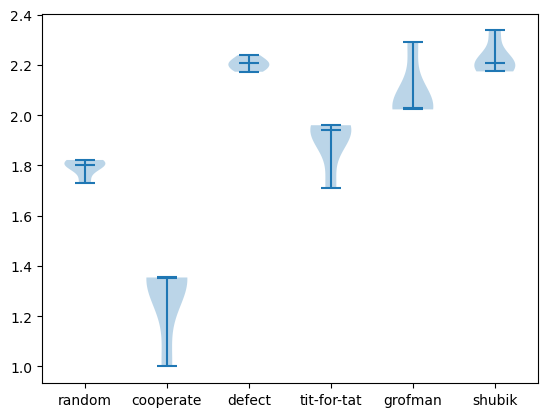

In [63]:
plt.violinplot(to_plot,
                  showmeans=False,
                  showmedians=True)
plt.xticks([y + 1 for y in range(len(to_plot) + 1)],
                  labels=['random', 'cooperate', 'defect', 'tit-for-tat', 'grofman', 'shubik'])

From the plot we can see that definitely the worst strategy is `cooperate` which is not any wonder as it is loses to most of the strategies because cooperating is not realy beneficial and can make 3 points max, and it loses greatly to the strategies that are based on defecting, to the most of strategies, that is.

Then, we can see that the most consistant and well-performing strategy is `defect` because defecting can not realy do bad, it can either gain many points or gain less, that's why it's so good and simple at the same time.

About `grofman` and `shubik` -- two of more complex strategies: we can see that both of them performed pretty good, `grofman`, though, a little worse and has only one value that exceeds the `defect` strategy but mean is close to the `tit-for-tat` strategy. However, `shubik` sometimes performed even better than `defect` but on average is pretty much the same, because if it faces for example `defact` strategy it becomes a `defect` vs `defect` battle, so it can adapt to the oponent and because of that ability it can overperform `defect`.     

### Task 2: Own strategy

I built my strategy based on the `shubik` strategy but (I think) made it even more "adapteble".

```
to my-strat
  set num-my-strat-games num-my-strat-games + 1
  set partner-defected? item ([who] of partner) partner-history

  ifelse (partner-defected?) [
      set future-defects future-defects - 2
  ] [ set future-defects future-defects + 2
  ]

  ifelse future-defects <= 0 [
    set defect-now? false
  ] [
    set defect-now? true
  ]

  set future-defects future-defects + 1

end
```

I tested it a bit against others, and it performs pretty good.

![](imgs/1.png)